<a href="https://colab.research.google.com/github/pedro092692/space_race/blob/main/Space_Missions_Analysis_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

1) What is the shape of data?
<br>
The data frame has 4324 row and 9 columns.

In [ ]:
df_data.shape

(4324, 9)

2) What are the column names?<br>
A:
<br>
<ul>
  <li>Unnamed: 0.1</li>
  <li>Unnamed: 0</li>
  <li>Organisation</li>
  <li>Location</li>
  <li>Date</li>
  <li>Detail</li>
  <li>Rocket_Status</li>
  <li>Price</li>
  <li>Mission_Status</li>
</ul>

In [ ]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

3) Are there any NaN values or duplicates?
<br>
A:
<br>
There are 3360 NaN values on column 'Prices'

In [ ]:
df_data.isna().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Organisation,0
Location,0
Date,0
Detail,0
Rocket_Status,0
Price,3360
Mission_Status,0


In [ ]:
df_data.sample(10)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
3790,3790,3790,RVSN USSR,"Site 161/35, Baikonur Cosmodrome, Kazakhstan","Wed Mar 22, 1967 14:05 UTC",Tsyklon | OGTch 3,StatusRetired,NaN,Failure
423,423,423,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Sat Jul 16, 2016 21:41 UTC",Soyuz U | Progress MS-03,StatusRetired,NaN,Success
1206,1206,1206,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Fri Feb 11, 2000 16:43 UTC",Space Shuttle Endeavour | STS-99,StatusRetired,450.0,Success
193,193,193,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Fri Nov 16, 2018 18:14 UTC",Soyuz FG | Progress MS-10 (71P),StatusRetired,NaN,Success
1629,1629,1629,Boeing,"SLC-17A, Cape Canaveral AFS, Florida, USA","Thu May 13, 1993 00:07 UTC",Delta II 7925 | USA-91 (GPS IIA-11),StatusRetired,NaN,Success
699,699,699,MHI,"LA-Y2, Tanegashima Space Center, Japan","Sat Jan 22, 2011 05:37 UTC",H-IIB | HTV-2,StatusRetired,112.5,Success
1327,1327,1327,Arianespace,"ELA-2, Guiana Space Centre, French Guiana, France","Fri Feb 27, 1998 22:38 UTC",Ariane 42P | Hot Bird 4,StatusRetired,NaN,Success
2406,2406,2406,RVSN USSR,"Site 132/1, Plesetsk Cosmodrome, Russia","Thu May 07, 1981 13:21 UTC",Cosmos-3M (11K65M) | Cosmos 1269,StatusRetired,NaN,Success
1987,1987,1987,RVSN USSR,"Site 45/1, Baikonur Cosmodrome, Kazakhstan","Sat Aug 01, 1987 03:59 UTC",Zenit-2 | Cosmos 1871,StatusRetired,NaN,Success
2235,2235,2235,RVSN USSR,"Site 41/1, Plesetsk Cosmodrome, Russia","Wed Nov 23, 1983 16:45 UTC",Molniya-M /Block ML | Molniya-1 n†­108,StatusRetired,NaN,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

View duplicate data
<br>
No Ducplicated data

In [ ]:
df_data.duplicated().sum()

0

Removing NaN rows

In [ ]:
df_data.dropna(inplace=True)
df_data

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
...,...,...,...,...,...,...,...,...,...
3855,3855,3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.0,Success
3971,3971,3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success
3993,3993,3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success
4000,4000,4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success


## Descriptive Statistics

In [ ]:
df_data.describe()

,Unnamed: 0.1,Unnamed: 0
count,964.00,964.00
mean,858.49,858.49
std,784.21,784.21
min,0.00,0.00
25%,324.75,324.75
50%,660.50,660.50
75%,"1,112.00","1,112.00"
max,"4,020.00","4,020.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
df_data.Organisation.value_counts()
df_data.Organisation.describe()

,Organisation
count,964
unique,25
top,CASC
freq,158


In [ ]:
number_of_launches = df_data.Organisation.value_counts()
# create a chart
donut = px.pie(
    labels=number_of_launches.index,
    values=number_of_launches.values,
    title='Number of Launches per Company',
    names=number_of_launches.index,
    hole=0.3
)
donut.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [ ]:
rocket_status = df_data.Rocket_Status.value_counts()
bar = px.bar(
    x = rocket_status.index,
    y = rocket_status.values,
    color = rocket_status.index,
    title = 'Number of Active versus Retired Rockets',
)
bar.update_layout(
    xaxis_title = 'Rocket Status',
    yaxis_title = 'Number of Rockets',
)
bar.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
mission_status = df_data.Mission_Status.value_counts()
mission_status

,count
Mission_Status,
Success,910
Failure,36
Partial Failure,17
Prelaunch Failure,1


In [ ]:
mission_status_donout = px.pie(
    labels=mission_status.index,
    values=mission_status.values,
    title='Distribution of Mission Status',
    names=mission_status.index,
    hole=0.6
)

mission_status_donout.show()

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [ ]:
df_data.Price = df_data.Price.str.replace(',', '').astype(float)
df_data.Price.describe()

,Price
count,964.00
mean,153.79
std,288.45
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


Text(0.5, 1.0, 'How Expensive are the Launches')

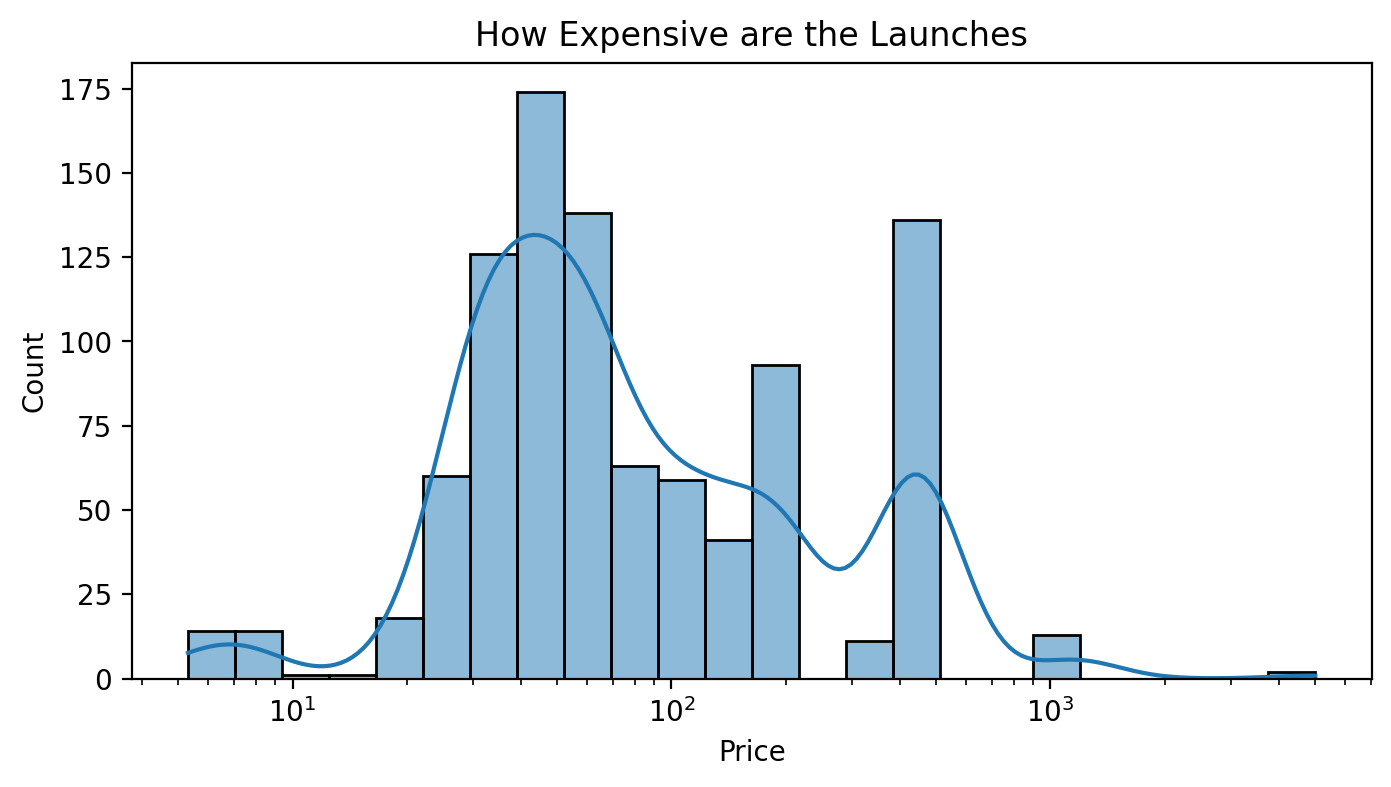

In [ ]:
df_data.sort_values(by='Price', ascending=True)
df_data.Price.describe()
plt.figure(figsize=(8, 4), dpi=200)
histogram = sns.histplot(
    df_data,
    x='Price',
    bins='auto',
    log_scale=True,
    kde=True
)
plt.title("How Expensive are the Launches")

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
country_name = df_data.Location.str.split(',').str[-1].str.strip()
df_data['Country'] = country_name
df_data.loc[df_data['Country'] == 'Yellow Sea', 'Country'] = 'China'
df_data.loc[df_data['Country'] == 'Gran Canaria', 'Country'] = 'USA'
df_data.loc[df_data['Country'] == 'Pacific Missile Range Facility', 'Country'] = 'USA'
missions_per_country = df_data.Country.value_counts()
missions_per_country.sort_values(ascending=True, inplace=True)
missions_per_country

,count
Country,
New Zealand,13
Japan,40
Kazakhstan,46
Russia,54
India,67
France,95
China,159
USA,490


In [ ]:
h_bar = px.bar(
    x=missions_per_country.values,
    y=missions_per_country.index,
    title='Number of Launches by Country',
    color=missions_per_country.index,
    orientation='h',
)

h_bar.update_layout(
    yaxis_title='Country',
    xaxis_title='Numbers Of Missions',
    coloraxis_showscale=False
)

h_bar.show()

In [ ]:
map = px.choropleth(
    missions_per_country,
    locationmode='country names',
    locations=missions_per_country.index,
    color=missions_per_country.values,
    hover_name=missions_per_country.index,
    title='Number of Launches by Country',
    color_continuous_scale='matter'
)
map.update_layout(
    coloraxis_showscale=True
)

map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
faliure_per_country = df_data[df_data.Mission_Status == 'Failure'].Country.value_counts()
faliure_per_country

,count
Country,
USA,20
India,5
China,4
New Zealand,2
France,2
Kazakhstan,2
Russia,1


In [ ]:
faliure_map = px.choropleth(
    faliure_per_country,
    locationmode='country names',
    locations=faliure_per_country.index,
    color=faliure_per_country.values,
    hover_name=faliure_per_country.index,
    title='Number of Failures by Country',
    color_continuous_scale='matter'
)

faliure_map.update_layout(
    coloraxis_showscale=True,
)

faliure_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [ ]:
organizations = df_data.groupby(['Country',
                                'Organisation',
                                'Mission_Status'
                                ], as_index=False).agg({'Detail': 'count'})

organizations

,Country,Organisation,Mission_Status,Detail
0,China,CASC,Failure,3
1,China,CASC,Partial Failure,3
2,China,CASC,Success,152
3,China,ExPace,Failure,1
4,France,Arianespace,Failure,2
5,France,Arianespace,Partial Failure,1
6,France,Arianespace,Success,91
7,France,ESA,Success,1
8,India,ISRO,Failure,5
9,India,ISRO,Partial Failure,3


In [ ]:
burst = px.sunburst(
    organizations,
    path=['Country', 'Organisation', 'Mission_Status'],
    values='Detail',
    title='Mission Status'
)

burst.show()

In [ ]:
df_data

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China
...,...,...,...,...,...,...,...,...,...,...
3855,3855,3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.00,Success,USA
3971,3971,3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,USA
3993,3993,3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success,USA
4000,4000,4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success,USA


# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
total_money_spent = df_data.groupby(['Organisation'], as_index=False).agg({
    'Price': 'sum'
})
total_money_spent.sort_values(by='Price', ascending=False, inplace=True)
total_money_spent

,Organisation,Price
14,NASA,"76,280.00"
0,Arianespace,"16,345.00"
21,ULA,"14,798.00"
16,RVSN USSR,"10,000.00"
2,CASC,"6,340.26"
20,SpaceX,"5,444.00"
15,Northrop,"3,930.00"
12,MHI,"3,532.50"
8,ISRO,"2,177.00"
22,US Air Force,"1,550.92"


In [ ]:
cost_bar = px.bar(
    total_money_spent,
    x='Organisation',
    y='Price',
    color='Organisation',
    title='Total Amount of Money Spent by Organisation on Space Missions',
)
cost_bar.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
amount_spent_per_launch = df_data.groupby(['Organisation'], as_index=False).agg({
    'Price': 'mean'
})
amount_spent_per_launch.sort_values(by='Price', ascending=False, inplace=True)
amount_spent_per_launch


,Organisation,Price
16,RVSN USSR,"5,000.00"
14,NASA,511.95
1,Boeing,177.29
0,Arianespace,170.26
21,ULA,151.00
7,ILS,101.54
12,MHI,95.47
13,Martin Marietta,80.16
22,US Air Force,59.65
9,JAXA,56.00


In [ ]:
cost_per_launch_bar = px.bar(
    amount_spent_per_launch,
    x='Organisation',
    y='Price',
    color='Organisation',
    title='Amount of Money Spent by Organisation per Launch',
)
cost_per_launch_bar.show()

# Chart the Number of Launches per Year

In [ ]:
# convert date to datetime object

In [ ]:
df_data.Date = pd.to_datetime(df_data.Date, format='mixed', utc=True)
launches_per_year = df_data.Date.dt.year.value_counts()
launches_per_year.sort_index(inplace=True)
launches_per_year

,count
Date,
1964,2
1965,2
1966,3
1967,8
1968,10
1969,8
1970,1
1971,2
1972,2


In [ ]:
moving_average = launches_per_year.rolling(window=5).mean()
moving_average

,count
Date,
1964,NaN
1965,NaN
1966,NaN
1967,NaN
1968,5.00
1969,6.20
1970,6.00
1971,5.80
1972,4.60


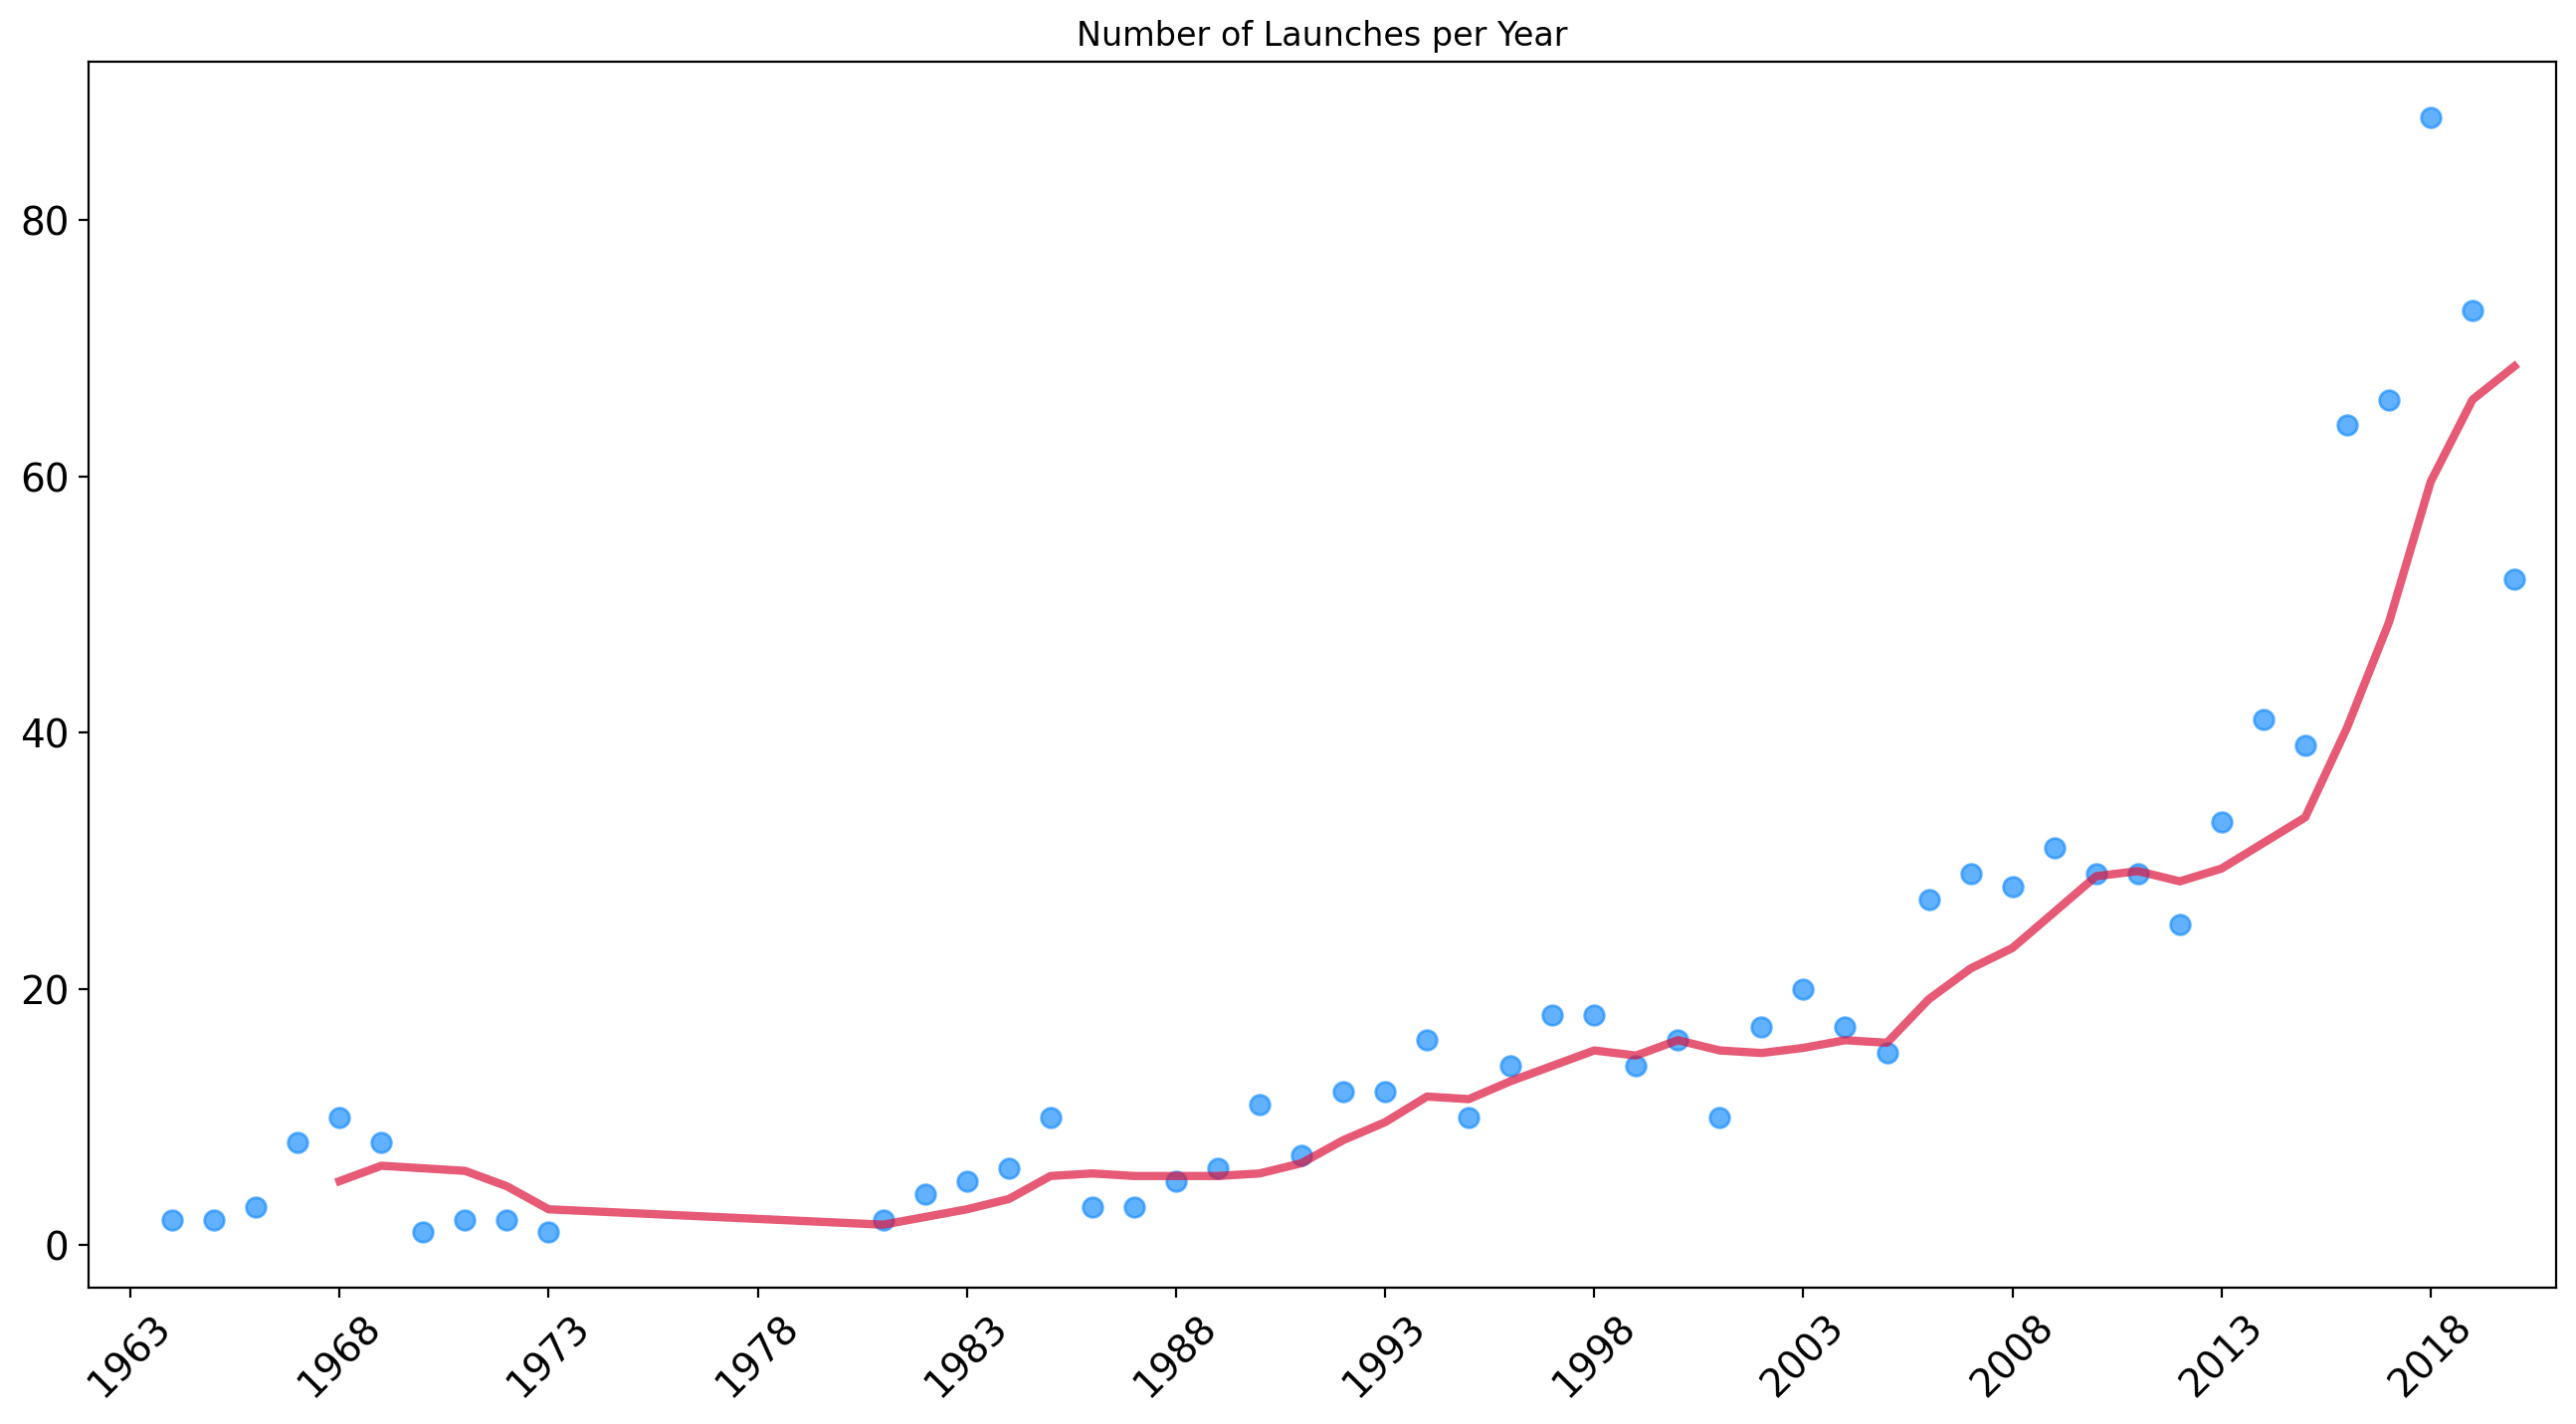

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Launches per Year')
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1963, 2021, step=5),
           fontsize=14,
           rotation=45
           )
ax = plt.gca()
ax.set_xlim(1962, 2021)

ax.scatter(
    x=launches_per_year.index,
    y=launches_per_year.values,
    color='dodgerblue',
    alpha=0.7,
    s=50
)

ax.plot(
    launches_per_year.index,
    moving_average.values,
    color='crimson',
    linewidth=3,
    alpha=0.7
)

plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [ ]:
launches_per_month = df_data.Date.dt.month.value_counts()
launches_per_month.sort_index(inplace=True)
launches_per_month

month_moving_average = launches_per_month.rolling(window=2).mean()
month_moving_average


,count
Date,
1,NaN
2,63.00
3,68.50
4,84.00
5,88.50
6,85.50
7,81.00
8,79.50
9,85.00


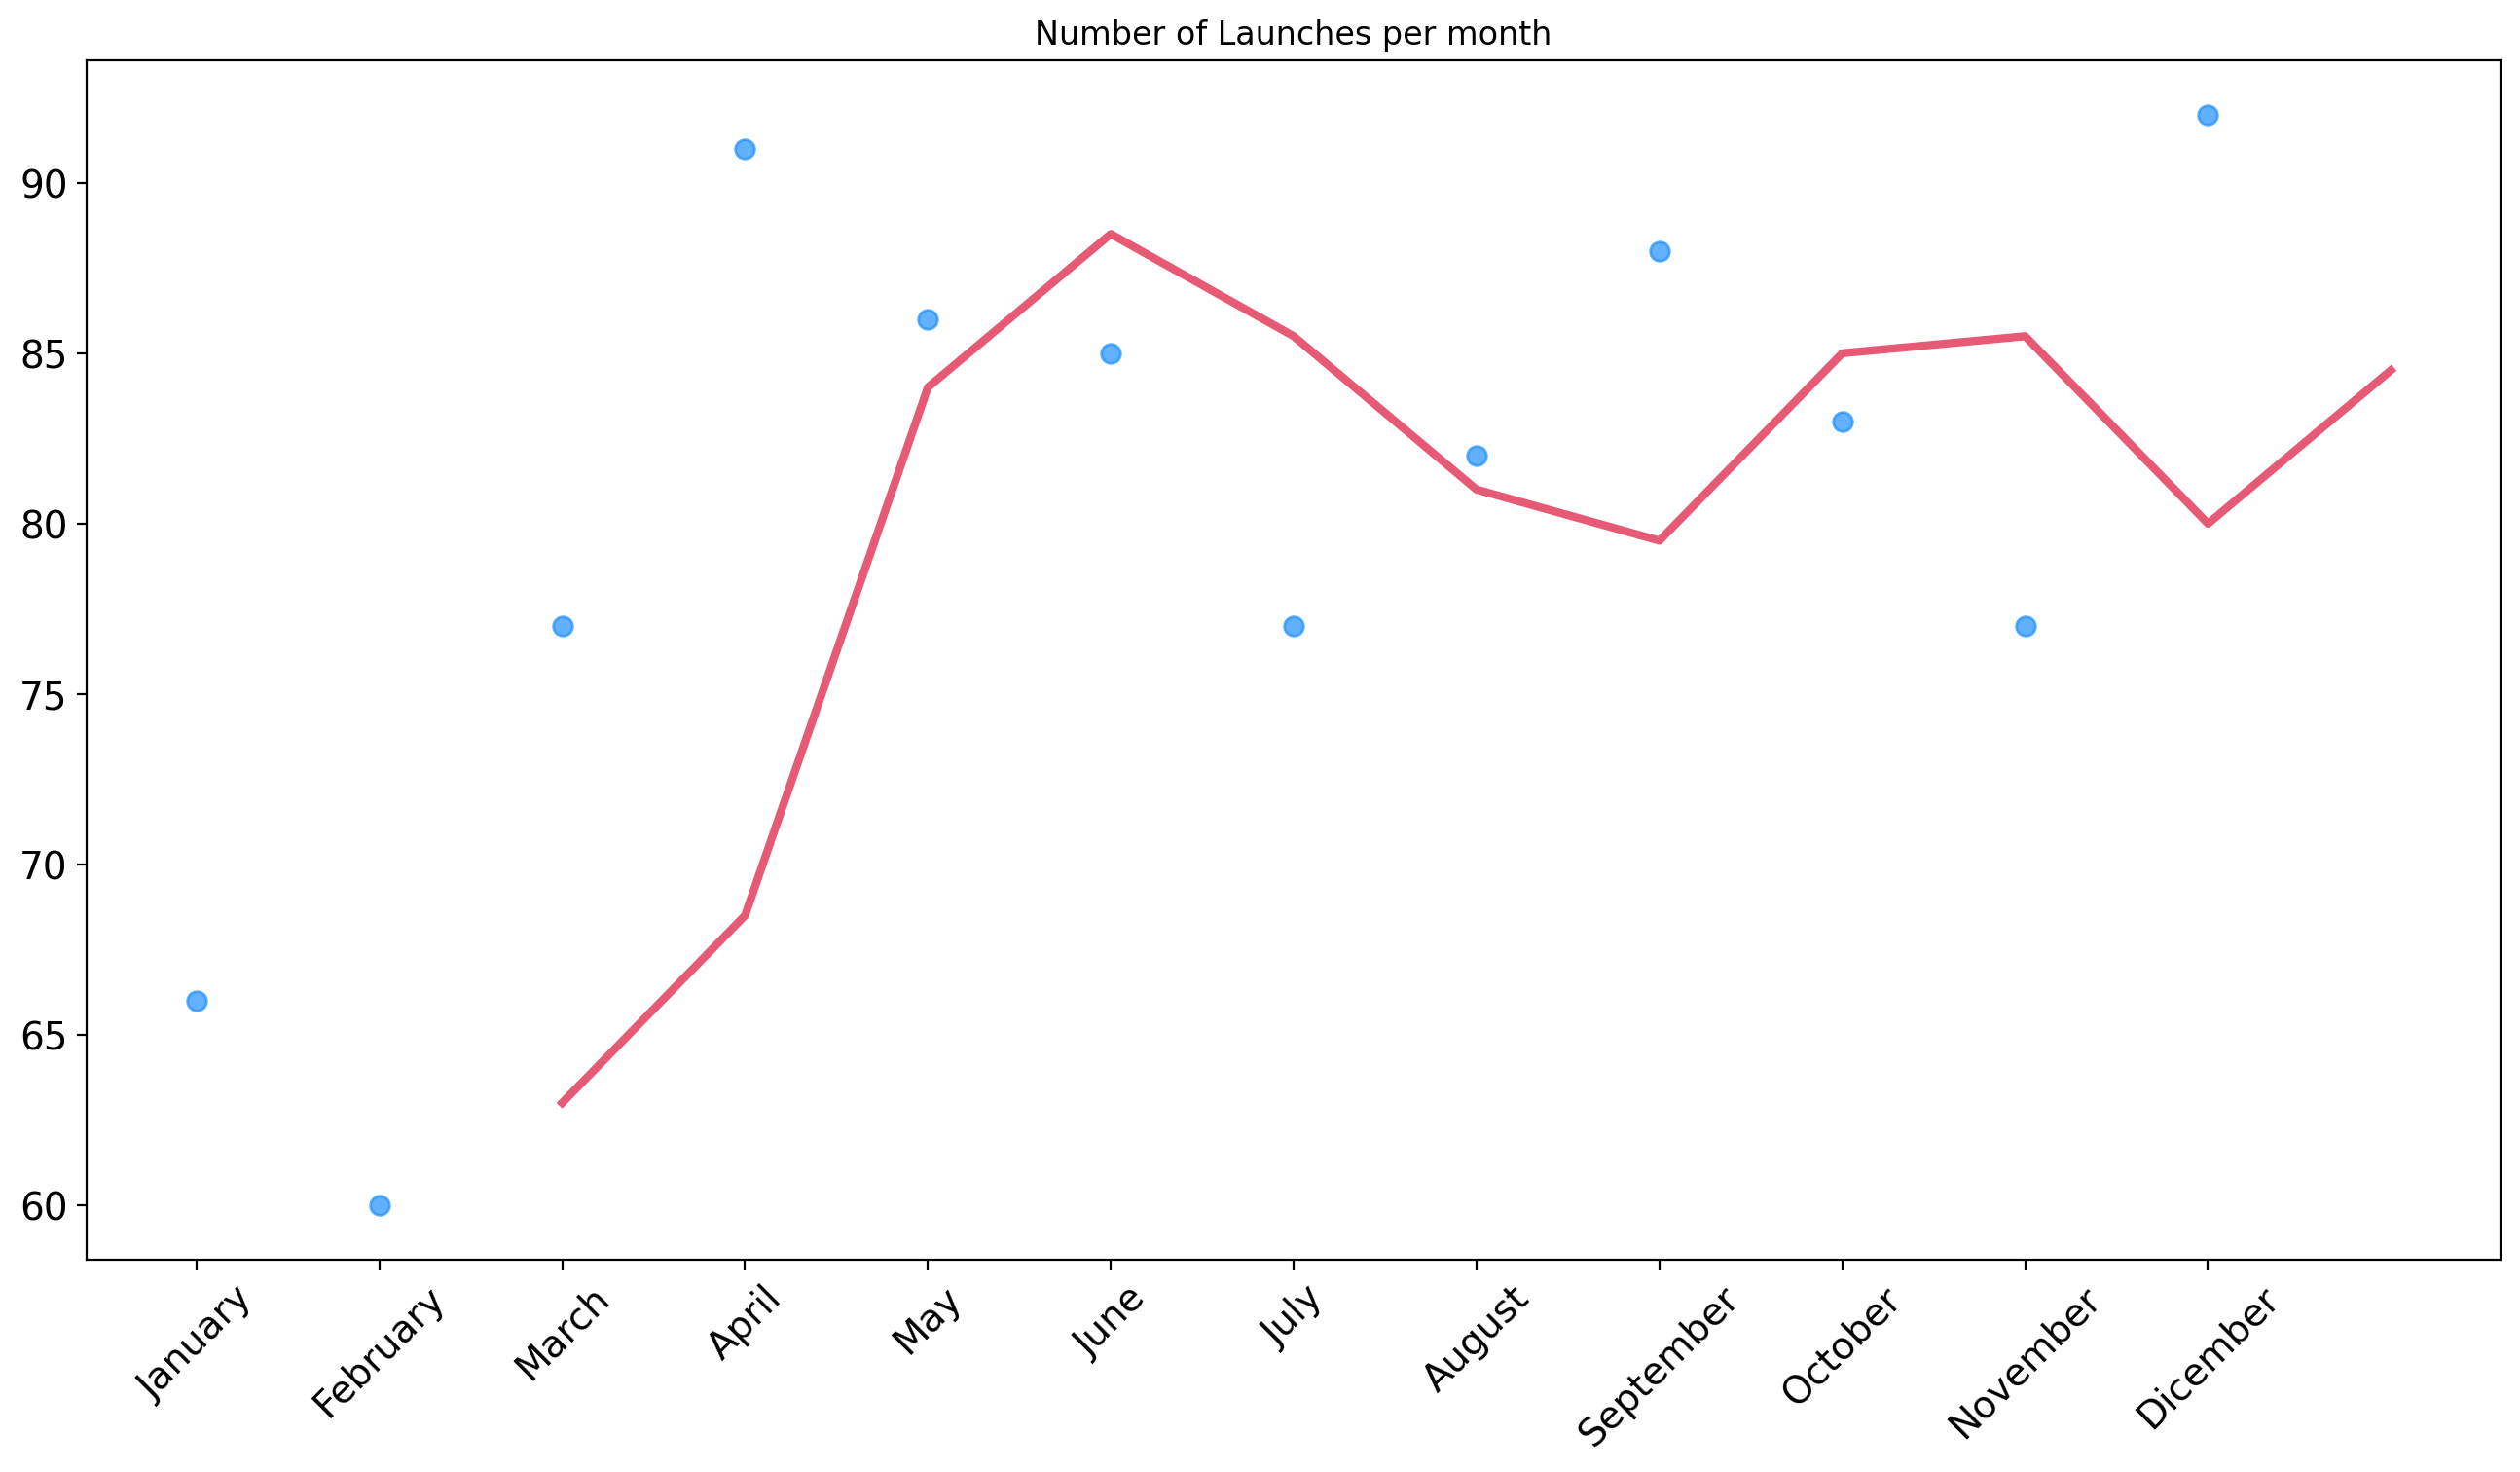

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Launches per month')
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(0, 12, step=1),
           fontsize=14,
           rotation=45
           )
ax = plt.gca()

ax.scatter(
    x=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'Dicember'],
    y=launches_per_month.values,
    color='dodgerblue',
    alpha=0.7,
    s=50
)

ax.plot(
    month_moving_average.index,
    month_moving_average.values,
    color='crimson',
    linewidth=3,
    alpha=0.7
)


plt.show()


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
popular_months = launches_per_month.sort_values(ascending=False)

In [ ]:
popular_months.drop([9, 5, 6, 10, 8, 3, 7, 11], inplace=True)
popular_bar = px.bar(
    x=['Dicember', 'April', 'January', 'February'],
    y=popular_months.values,
    color=popular_months.index
)

popular_bar.update_layout(
    xaxis_title='Month',
    yaxis_title='Launches',
    coloraxis_showscale=False,
)

popular_bar.show()

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [ ]:
price_per_year = df_data.groupby(df_data.Date.dt.year).agg({
    'Price': 'mean'
})
price_per_year

,Price
Date,
1964,63.23
1965,63.23
1966,59.00
1967,196.62
1968,279.20
1969,609.50
1970,"1,160.00"
1971,"1,160.00"
1972,"1,160.00"


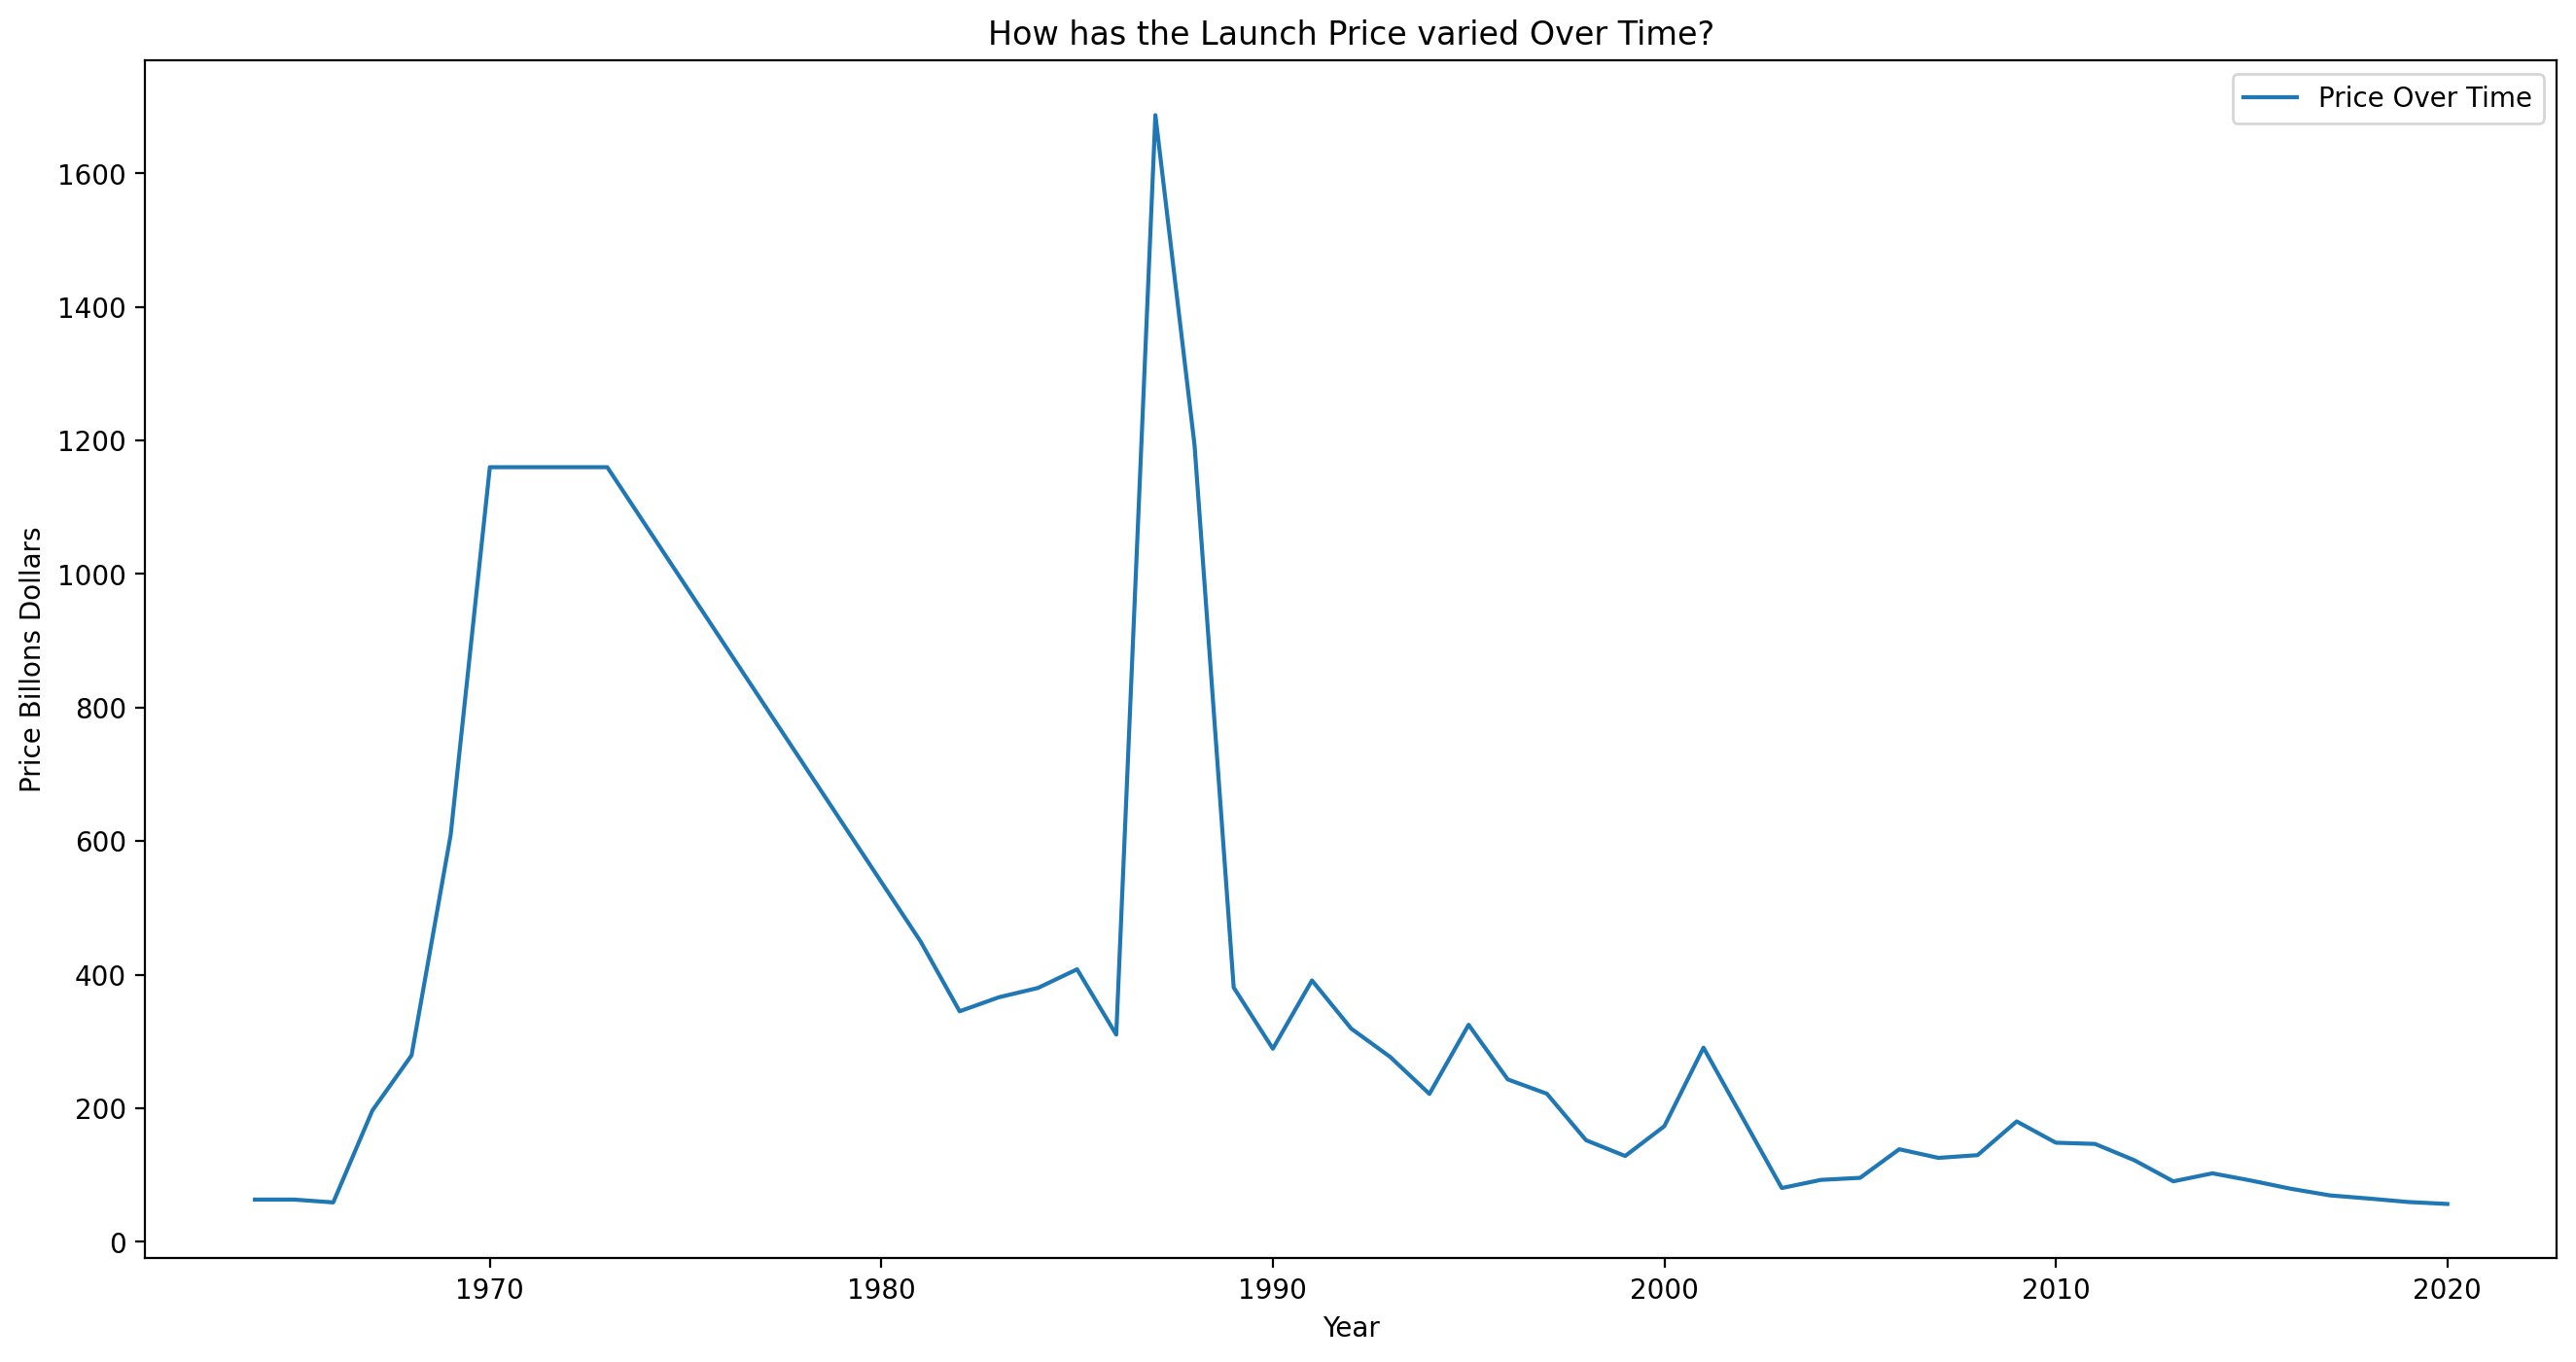

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('How has the Launch Price varied Over Time?')
plt.xlabel('Year')
plt.ylabel('Price Billons Dollars')
plt.plot(price_per_year, label='Price Over Time')
plt.legend()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [ ]:
top_ten_organisations = df_data.Organisation.value_counts().head(10)
top_ten_organisations

top_organisation_bar = px.bar(
    x=top_ten_organisations.index,
    y=top_ten_organisations.values,
    color=top_ten_organisations.index,
    title='Chart the Number of Launches over Time by the Top 10 Organisations',
)

top_organisation_bar.update_layout(
    xaxis_title='Oganisation',
    yaxis_title='Number of Launches',
    coloraxis_showscale=False,
)

top_organisation_bar.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [ ]:
df_cold_war = pd.read_csv('mission_launches.csv')
# add country name
df_cold_war['Country'] = df_cold_war.Location.str.split(',').str[-1].str.strip()
# rename countries
df_cold_war.loc[df_cold_war['Country'] == 'Kazakhstan', 'Country'] = 'Russia'
df_cold_war.loc[df_cold_war['Country'] == 'Barents', 'Country'] = 'Russia'
df_cold_war.loc[df_cold_war['Country'] == 'Gran Canaria', 'Country'] = 'USA'
df_cold_war.loc[df_cold_war['Country'] == 'Pacific Missile Range Facility', 'Country'] = 'USA'
df_cold_war.loc[df_cold_war['Country'] == 'New Mexico', 'Country'] = 'USA'
#conver data in datetime object
df_cold_war.Date = pd.to_datetime(df_cold_war.Date, format='mixed', utc=True)
#filver by year and countries
df_cold_war = df_cold_war.loc[ (df_cold_war.Date.dt.year <= 1991) & (df_cold_war.Country.isin(['USA', 'Russia'])) ]
df_cold_war

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
1718,1718,1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991-12-20 00:00:00+00:00,Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success,Russia
1719,1719,1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18 03:54:00+00:00,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,Russia
1721,1721,1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07 22:47:00+00:00,Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,USA
1722,1722,1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1991-11-28 13:23:00+00:00,Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success,USA
1723,1723,1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-11-27 03:30:00+00:00,Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success,Russia
...,...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Russia


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [ ]:
number_of_launches_cold_war = df_cold_war.Country.value_counts()
number_of_launches_cold_war



,count
Country,
Russia,1770
USA,662


In [ ]:
cold_launches_pie = px.pie(
    labels=number_of_launches_cold_war.index,
    values=number_of_launches_cold_war.values,
    title='Total Number of Launches of the USSR and the USA',
    names=number_of_launches_cold_war.index,
    hole=0.3
)
cold_launches_pie.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
launches_per_year_cold_war = df_cold_war.groupby([df_cold_war.Date.dt.year, 'Country']).agg({
    'Detail': 'count'
})
t = launches_per_year_cold_war.unstack()
t.columns = t.columns.droplevel()
bar_launches_per_year_cold_war = px.bar(
    t,
    x=t.index,
    y=t.columns,
    barmode='group',
)

bar_launches_per_year_cold_war.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Launches',
    coloraxis_showscale=False,
)

bar_launches_per_year_cold_war.show()

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
number_of_fail_missions = df_cold_war.groupby(['Country', 'Mission_Status'], as_index=False).agg({
    'Detail': 'count'
})
number_of_fail_missions

,Country,Mission_Status,Detail
0,Russia,Failure,120
1,Russia,Partial Failure,41
2,Russia,Prelaunch Failure,1
3,Russia,Success,1608
4,USA,Failure,101
5,USA,Partial Failure,25
6,USA,Success,536


In [ ]:
bar_fail_missions = px.bar(
    number_of_fail_missions,
    x='Country',
    y='Detail',
    color='Mission_Status',
    barmode='group',
)

bar_fail_missions.update_layout(
    xaxis_title='Country',
    yaxis_title='Number of Missions',
    coloraxis_showscale=False,
)

bar_fail_missions.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [ ]:
percent_of_fail = df_data.groupby([df_data.Date.dt.year, 'Mission_Status']).agg({
    'Detail': 'count'
})
percent_of_fail.reset_index(inplace=True)
percent_of_fail
bar_percent_of_fail = px.bar(
    percent_of_fail,
    x='Date',
    y='Detail',
    color='Mission_Status',
)

bar_percent_of_fail.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [ ]:
lead_country_per_year = df_data.groupby([df_data.Date.dt.year, 'Country']).agg({
    'Detail': 'count'
})
lead_country_per_year.reset_index(inplace=True)
lead_country_per_year

bar_lead_country_per_year = px.bar(
    lead_country_per_year,
    x='Date',
    y='Detail',
    color='Country',
    barmode='group',
)

bar_lead_country_per_year.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Launches',
    coloraxis_showscale=False,
)

bar_lead_country_per_year.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [ ]:
top_organisation_per_year = df_data.groupby([df_data.Date.dt.year, 'Organisation']).agg({
    'Detail': 'count'
})
top_organisation_per_year.reset_index(inplace=True)
bar_lead_country_per_year = px.bar(
    top_organisation_per_year,
    x='Date',
    y='Detail',
    color='Organisation',
    barmode='group',
)
bar_lead_country_per_year.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Launches',
    coloraxis_showscale=False,
)
bar_lead_country_per_year.show()

In [ ]:
top_organisation_per_year.sort_values(by='Detail', ascending=False)

,Date,Organisation,Detail
233,2018,CASC,27
245,2019,CASC,21
241,2018,SpaceX,21
229,2017,SpaceX,18
257,2020,CASC,16
...,...,...,...
100,2003,NASA,1
103,2004,Boeing,1
105,2004,ILS,1
106,2004,ISRO,1
